In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

label is:  4


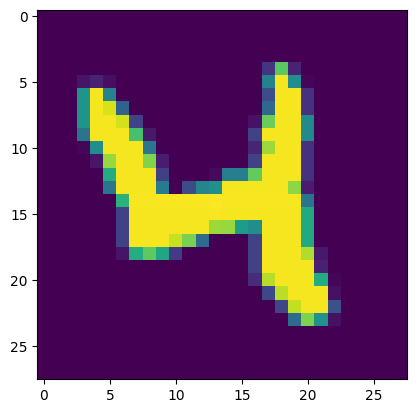

In [ ]:
import matplotlib.pyplot as plt
print("label is: ",y_train[20])
plt.imshow(x_train[20])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

##converting image into channel; in ANN, it is a vector based

In [ ]:
x_train[0].shape
###channel = 1 for greyscale image; channel = 3 (rgb) for colorful image

(28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##one-hot encoding

label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


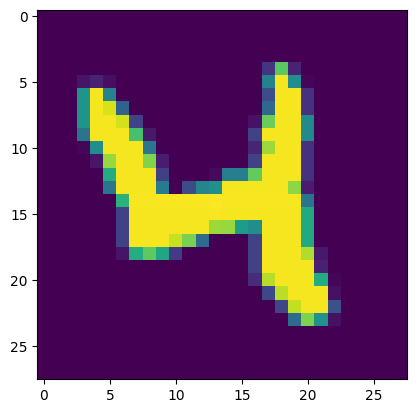

In [ ]:
import matplotlib.pyplot as plt
print("label is: ",y_train[20])
plt.imshow(x_train[20])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model = Sequential()  #empty CNN architecture
model.add(Conv2D(16,kernel_size=3,activation="relu",input_shape=(28,28,1)))
##adding cnn layer1;16---filters(features)
model.add(MaxPool2D())
model.add(Conv2D(32,kernel_size=3,activation="relu"))
##adding cnn layer2;add another layer for experimenting
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5045 - accuracy: 0.9344 - val_loss: 0.1149 - val_accuracy: 0.9686
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1048 - accuracy: 0.9695 - val_loss: 0.1009 - val_accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0695 - accuracy: 0.9793 - val_loss: 0.0599 - val_accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.0667 - val_accuracy: 0.9809


In [ ]:
##60000/32 = 1875 (60000--image size;32-last maxpooling size )

In [ ]:
prediction = model.predict(x_test[0:1])

1/1 [==============================] - 0s 29ms/step


enter the index of random image: 20
1/1 [==============================] - 0s 71ms/step
predicted output is:  [4]
actual output is : [4]


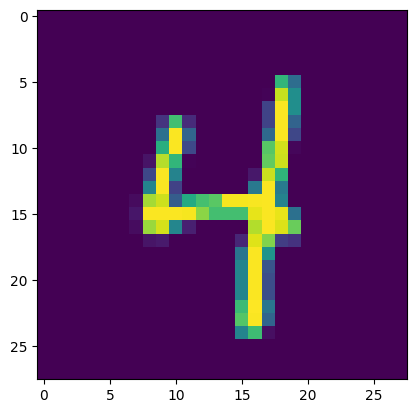

In [ ]:
###to identify the index of max prediction
import numpy as np
n = int(input("enter the index of random image: "))
prediction = model.predict([x_test[n-1:n]])
print("predicted output is: ",np.where(prediction[0]==max(prediction[0]))[0])
print("actual output is :",np.where(y_test[n-1]==1)[0])
plt.imshow(x_test[n-1])

In [ ]:
np.where(y_test[0]==1)[0]

array([7])

In [ ]:
(y_test[0])

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)